In [92]:
from func_ler_grafo import ler_grafo
from algoritmos import Karger
from tqdm import tqdm
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '..')

In [93]:
nome_arquivo = 'graph_type1_1.txt'
lista_adj, lista_aresta = ler_grafo(f'./instancias/in/{nome_arquivo}')

In [94]:
min_corte_correto = int(open(f'./instancias/out/{nome_arquivo}', 'r').readlines()[0])
min_corte_correto

1

In [97]:
algoritmo = Karger(lista_adj, lista_aresta)

n_exec = 1000
n_iter = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]

probabilidades_karger = []

for i in tqdm(range(len(n_iter))):
    it = n_iter[i]
    
    n_acertos_karger = 0
    
    for _ in tqdm(range(n_exec)):
        min_cut_karger = algoritmo.executar_n(it)
        
        if min_cut_karger == min_corte_correto:
            n_acertos_karger += 1
    
    
    probabilidades_karger.append(n_acertos_karger / n_exec)

print(probabilidades_karger)

100%|██████████| 14/14 [00:07<00:00,  1.81it/s]

[0.09, 0.404, 0.662, 0.78, 0.88, 0.929, 0.966, 0.967, 0.979, 0.988, 0.995, 0.997, 1.0, 0.999]


# Plotando gráfico da Taxa de acerto e o Número de Iterações do Karger

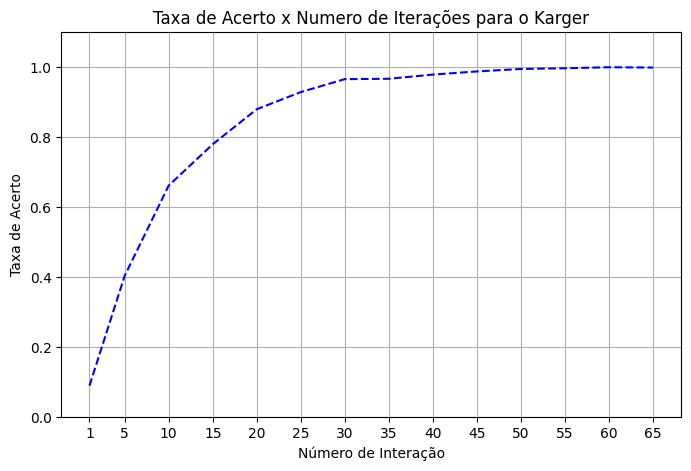

In [98]:
plt.figure(figsize=(8, 5))
plt.plot(n_iter, probabilidades_karger, 'b--')
plt.title('Taxa de Acerto x Numero de Iterações para o Karger')
plt.ylabel('Taxa de Acerto')
plt.xlabel('Número de Interação')
plt.ylim([0, 1.1])
plt.xticks(n_iter)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.grid(True)
plt.show()